### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Demostration video: *k*-means clustering


#### *This is a possible solution to the demostration video.* 

In this video, we will create, fit and interpret a k-means clustering model based on a real life scenario.

Imagine we’re working as a data analyst at a fruit breeding research station. As one of our quarterly goals, we decide to investigate the possibility of utilising k-means clustering to understand data collected by all the researchers.

To get there, let’s first set two broad questions for us to answer:
- Can we use k-means clustering to draw useful conclusions and predictions? For example, can the fruit type be deduced from sepal length and sepal width based on k-means clustering?
- How can we improve the accuracy of the model?

# 

## 1. Prepare your workstation

Okay, so our first step is always to prepare our workstation, starting with importing  the necessary libraries and the data set. 
The data set we have from the research station – `fruit.csv` – contains a data of 1,500 fruit blossoms from three different fruit types: apricots, peaches, and plums. The sepal length and width of fruit blossoms were measured on mature fruit trees between the ages of 7 and 10 years.

Pollen of fruit flowers are harvested for pollination when the blossoms are in a balloon phase. Although the petals of apricots, plums and peaches differ in colour, the difference is not always as distinct enough for colourblind researchers. Therefore, the sepal width and legth were measured to determine whether the fruit type of the harvested blossoms can be identified based on sepal width and length.

In [1]:
# Import libraries.
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# Load the data.
df = pd.read_csv('fruit.csv')

# View the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sepal_length    1500 non-null   float64
 1   sepal_width     1500 non-null   float64
 2   tree_age        1500 non-null   int64  
 3   location        1500 non-null   object 
 4   colour_blossom  1500 non-null   object 
 5   fruit_type      1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


# 

## 2. Prepare the data

In [2]:
# Drop unnecessary columns.
df_fruit = df.drop(columns=['tree_age', 'location', 'colour_blossom'])

# Display a summary of the numeric variables and column names.
print(df_fruit.columns)
df_fruit.describe()

Index(['sepal_length', 'sepal_width', 'fruit_type'], dtype='object')


,sepal_length,sepal_width
count,1500.000000,1500.000000
mean,6.030071,3.171469
std,0.975327,0.536772
min,3.941667,1.826087
25%,5.280000,2.800000
50%,5.980000,3.100000
75%,6.674000,3.480000
max,9.480000,5.300000


# 

## 3. Visualise the data

### Scatterplot

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

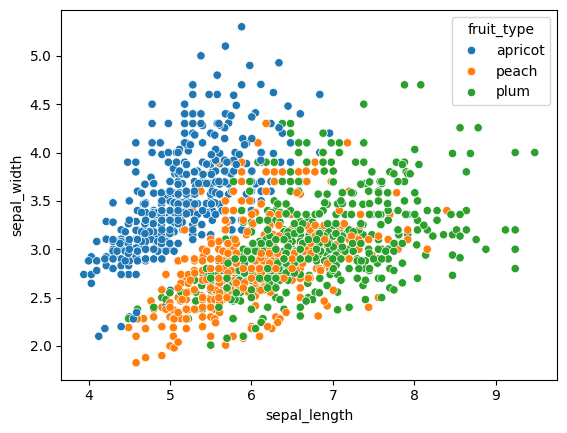

In [3]:
# Import Seaborn and Matplotlib.
from matplotlib import pyplot as plt
import seaborn as sns

# Create a scatterplot with Seaborn.
sns.scatterplot(x='sepal_length',
                y='sepal_width',
                data=df_fruit,
                hue='fruit_type')

### Pairplot

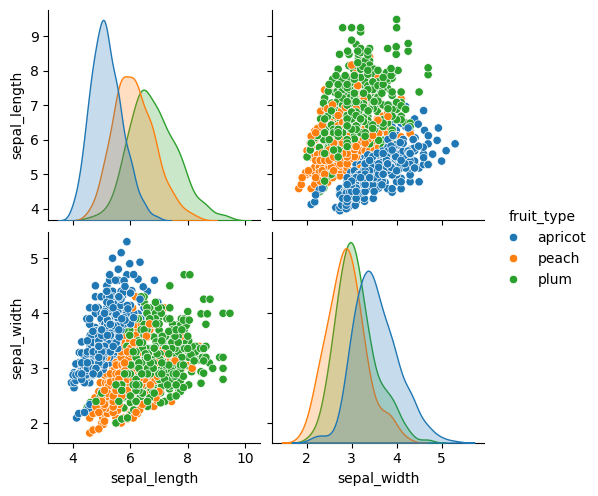

In [4]:
# Create a pairplot with Seaborn.
x = df_fruit[['sepal_length', 'sepal_width']]

sns.pairplot(df_fruit,
             vars=x,
             hue='fruit_type',
             diag_kind='kde')

# 

## 4. Improve the accuracy

### The elbow method
The elbow method is used to determine the optimal number of clusters in *k*-means clustering. However, the elbow method doesn't always work well, especially if the data is not very clustered. 

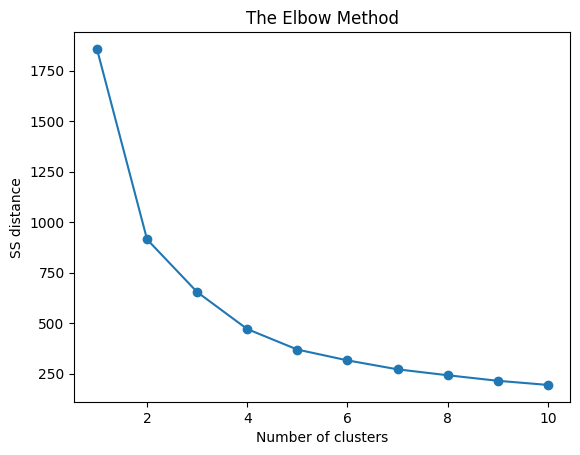

In [5]:
# Import the KMeans class.
from sklearn.cluster import KMeans 

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

### The silhouette method

The silhouette method computes silhouette coefficients of each point that measure how much a point is similar to its own cluster compared to other clusters. It provides a succinct graphical representation of how well each object has been classified.

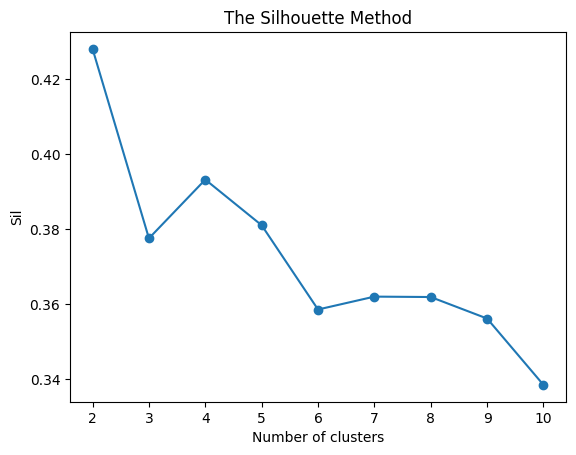

In [6]:
# Import silhouette_score class from sklearn.
from sklearn.metrics import silhouette_score

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

# 

# Selecting the number of clusters

### As we have three fruit types, let's set `k=3` (three clusters).

## 5a. Evaluate and fit the model

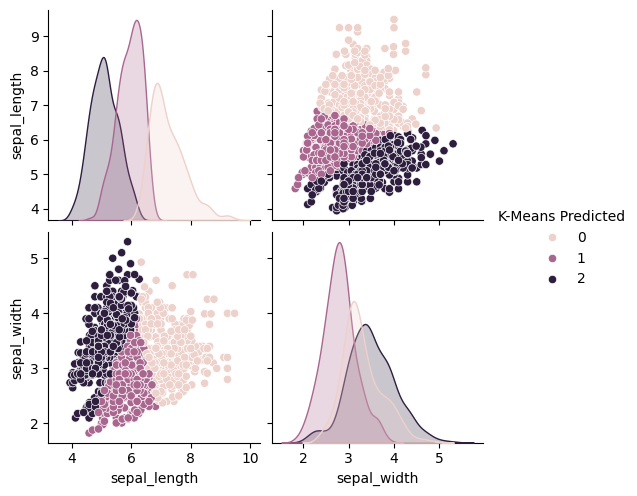

In [7]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [8]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    566
2    502
0    432
Name: count, dtype: int64

## 6a. Visualise the clusters

In [9]:
# View the K-Means predicted.
print(x.head())

   sepal_length  sepal_width  K-Means Predicted
0           5.1          3.5                  2
1           4.9          3.0                  2
2           4.7          3.2                  2
3           4.6          3.1                  2
4           5.0          3.6                  2


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

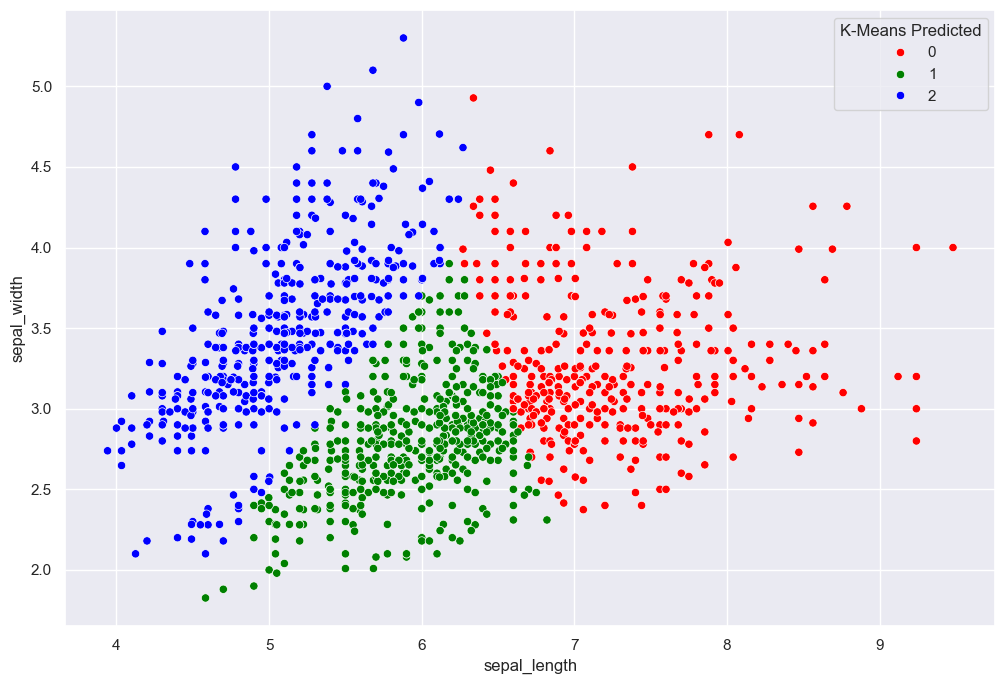

In [10]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='sepal_length' , 
                y ='sepal_width',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue'])

# 

### Let's set `k=4` and compare it with three clusters.

## 5a. Evaluate and fit the model

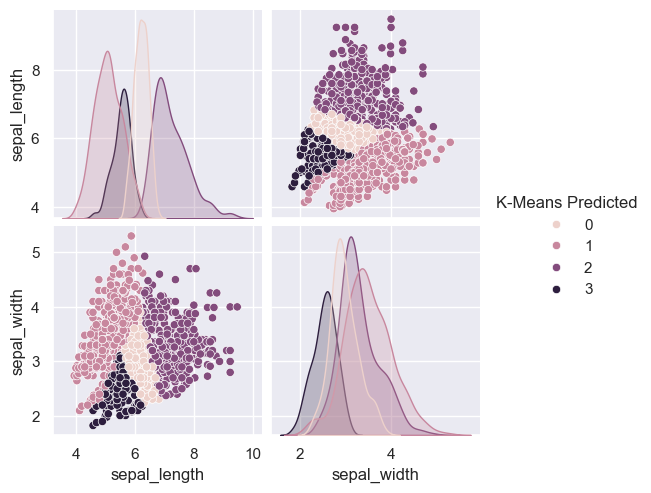

In [11]:
# Use four clusters.
kmeans = KMeans(n_clusters=4,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x, 
             hue='K-Means Predicted',
             diag_kind='kde')

In [12]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

K-Means Predicted
1    500
2    432
0    335
3    233
Name: count, dtype: int64

## 6a. Visualise the clusters

In [13]:
# View the K-Means predicted.
print(x.head())

   sepal_length  sepal_width  K-Means Predicted
0           5.1          3.5                  1
1           4.9          3.0                  1
2           4.7          3.2                  1
3           4.6          3.1                  1
4           5.0          3.6                  1


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

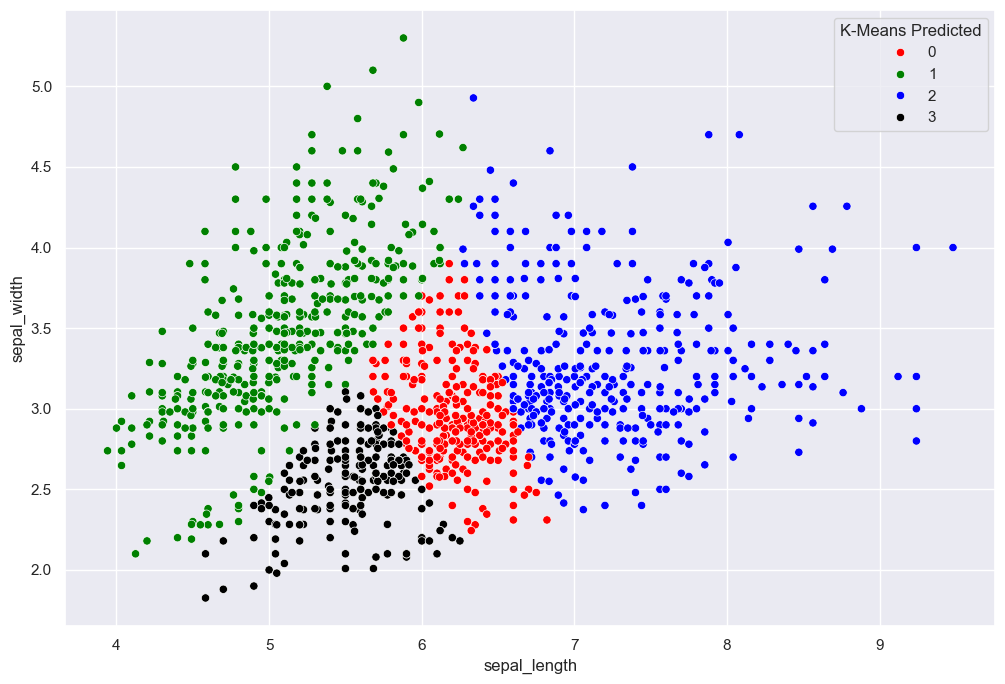

In [14]:
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})

# Create a scatterplot.
sns.scatterplot(x='sepal_length' , 
                y ='sepal_width',
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black'])

# 

## 7. Conclusion(s)

>Although there were only three fruit types (apricot, plum, and peach), it seems that `k=4` (four clusters) might give the best results (groups). The three fruit types are closely related (same Genus, but different species); therefore, `Cluster 0` for both `k=3` and `k=4` is the largest group. The number of predicted values per class indicates a better distribution for `k=4` than `k=3`. 